<h1 style="color:blue;text-align:center;">Lab2 : Rule Based NLP and Regex & word Embedding</h1>

<hr style="border:2px solid blue;">

<h3 style="color:blue;">Realised by: <strong style="color:black;">Ouahid Mariyam</strong></h3>
 

<h3 style="color:blue;">Guided by: <strong style="color:black;">Pr. ELAACHAk LOTFI</strong></h3> 
   

<b>Objective </b>: The main purpose behind this lab is to get familiar with NLP Rule based, Regex
 and NLP Word embedding.

# Summary: Lab 2

1. [Part 1: Rule-Based NLP and Regex](#part-1)
2. [Part 2: Word Embedding](#part-2)
    1. [Apply one hot encoding, bag of words, TF-IDF technics](#tech)
    2. [Apply one Word2Vec Approach (Skip Gram, CBOW)](#word)
    3. [Apply Glove and FastText approaches on the same DataSet)](#fast)
    4. [Plot all the encoded / vectorized vectors by using Tsne Algorithm)](#plot)
3. [Lab Reflection](#lab)

# 1. Part 1: Rule-Based NLP and Regex <a id='part-1'></a>


In [1]:
# Importing the regular expression module for pattern matching
import re
# Importing the word to number conversion module
from word2number import w2n

In [2]:
# Function to clean the product name by removing noise words
def clean_product_name(product):
    """
    Clean the product name by removing noise words.

    Args:
    - product (str): The product name to be cleaned.

    Returns:
    - str: The cleaned product name.
    """
    # List of noise words that should be removed from the product name
    noise_words = ['kilos of', 'for', 'with', 'a kilogram', 'each', 'dollars', '$']
    # Removing each noise word from the product name using regular expressions
    for noise in noise_words:
        product = re.sub(r'\b' + noise + r'\b', '', product)
    # Stripping any extra spaces from the cleaned product name
    return product.strip()

In [3]:
# Function to convert words representing numbers into actual numerical values
def convert_numbers_in_text(text):
    """
    Convert words representing numbers into actual numerical values.

    Args:
    - text (str): The text containing words to be converted.

    Returns:
    - str: The text with words converted to numbers.
    """
    # Splitting the text into individual words
    words = text.split()
    converted_words = []
    # Iterating through each word in the text
    for word in words:
        try:
            # Attempting to convert the word to a number
            number = w2n.word_to_num(word)
            # If successful, appending the numerical value to the list of converted words
            converted_words.append(str(number))
        except ValueError:
            # If conversion fails, keeping the original word
            converted_words.append(word)
    # Joining the converted words back into a single string
    return ' '.join(converted_words)

In [4]:
# Function to generate a bill from a given text input
def generate_bill(text):
    """
    Generate a bill from a given text input.

    Args:
    - text (str): The text input describing purchases.

    Returns:
    - None
    """
    # Convert words representing numbers into actual numerical values
    converted_text = convert_numbers_in_text(text)
    
    # Regular expression pattern to extract data (quantity, product name, price)
    pattern = r'(\d+)\s+(.*?)\s+(\d+(?:[.,]\d+)?)\s*(?:dollars?|each|\$|a kilogram)?'
    # Finding all matches of the pattern in the converted text
    items = re.findall(pattern, converted_text)
    
    # If no items are found, print an error message and return
    if not items:
        print("No items were found in the text. Please provide correct data.")
        return
    
    # Clean and prepare data for the receipt
    cleaned_items = [
        # Convert quantity to integer, clean product name, convert price to float
        (int(item[0]), clean_product_name(item[1]), float(item[2].replace(',', '.')))
        for item in items
    ]

    # Display the receipt with a header
    print("\nGenerated Bill:")
    print("{:<20} {:<10} {:<10} {:<10}".format("Product", "Quantity", "Unit Price", "Total Price"))
    
    # Calculate and display receipt lines for each item
    for quantity, product, unit_price in cleaned_items:
        total_price = quantity * unit_price
        print("{:<20} {:<10} {:<10} {:<10}".format(product, quantity, unit_price, total_price))

In [5]:
# Ask the user to provide text describing purchases 
user_input = input("Please enter the details of your purchases: ")
# Generate and display the bill based on the user input
generate_bill(user_input)

Please enter the details of your purchases: I bought three Samsung smartphones 150 $ each, four kilos of fresh banana for 1,2 dollar a  kilogram and one Hamburger with 4,5 dollar

Generated Bill:
Product              Quantity   Unit Price Total Price
Samsung smartphones  3          150.0      450.0     
fresh banana         4          1.2        4.8       
Hamburger            1          4.5        4.5       


In [6]:
user_input = input("Please enter the details of your purchases: ")
generate_bill(user_input)

Please enter the details of your purchases: I purchased two books for 10 dollars each, three cups of coffee at 3.5 dollars per cup, and one pizza for 15 dollars

Generated Bill:
Product              Quantity   Unit Price Total Price
books                2          10.0       20.0      
cups of coffee at    3          3.5        10.5      
pizza                1          15.0       15.0      


# 2. Part 2: Word Embedding <a id='part-2'></a>

In [7]:
import pymongo
import pandas as pd

In [8]:
# Connect to MongoDB
client = pymongo.MongoClient("mongodb://localhost:27017")
db = client["myScraping"]
collection = db["mydb"]

# Fetch data from MongoDB
cursor = collection.find()

# Convert the cursor to a list of dictionaries
data = list(cursor)

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Close the MongoDB connection
client.close()

# Display the DataFrame
df

,_id,title,properties,chef,ingredients,recipes
0,66135d7bccad4da1905a3eb0,تشيز كيك قليل الدسم,سهلة,ليلى فتح الله,180 \n\n\nجرام بسكويت عادي\n\n\n\n\n\n\n 90 \n...,1\n\nيحمى الفرن إلى 160 درجة مئوية (بدون مروحة...
1,66135d7bccad4da1905a3eb1,كيك الموز بالتوفي,سهلة,منال العالم,1 1/2 \n\n\nكوب دقيق\n\n\n\n\n\n\n 1 \n\n\nملع...,1\n\nيثبت الرف الشبكي في وسط الفرن. يسخن الفرن...
2,66135d7bccad4da1905a3eb2,كيك ماربل بالكاكاو,سهلة,منال العالم,3 \n\n\nكوب دقيق\n\n\n\n\n\n\n 3 \n\n\nملعقة ص...,1\n\nيحضر قالب ذو فتحة من الوسط سعة 12 كوب. يد...
3,66135d7bccad4da1905a3eb3,كيك القرع واللوز,سهلة,وصفات فتافيت,125 \n\n\nجرام دقيق اللوز\n\n\n\n\n\n\n 25 \n\...,1\n\nيخلط دقيق اللوز والطحين متعدد الاستعمالات...
4,66135d7bccad4da1905a3eb4,كعكة‭ ‬الجواهر,سهلة,وصفات فتافيت,0 \n\n\nعبوة تحتوي على 4 أنواع مختلفة من الجيل...,Recipes not available
5,66135d7bccad4da1905a3eb5,كعكة‭ ‬البلاك‭ ‬فورست,سهلة,وصفات فتافيت,200 \n\n\nجم الدقيق\n\n\n\n\n\n\n 50 \n\n\nجم ...,1\n\nتُخفق‭ ‬الزبدة‭ ‬مع‭ ‬السكر‭ ‬حتى‭ ‬يتكون...
6,66135d7bccad4da1905a3eb6,مخبوز البانوفى بالموز ( كيك...,متوسطة,أفنان,190 \n\n\nجرام دقيق\n\n\n\n\n\n\n 0 \n\n\nملعق...,1\n\nلعمل الصوص : يرفع السكر مع الماء على النا...
7,66135d7bccad4da1905a3eb7,كيك‭ ‬التمر,سهلة,وصفات فتافيت,2 \n\n\n بيضة\n\n\n\n\n\n\n 3 \n\n\n أكواب من ...,1\n\nتُنخل‭ ‬المكونات‭ ‬الجافة‭ ‬معاً‭ ‬فيما‭ ...
8,66135d7bccad4da1905a3eb8,كيكة السميد,سهلة,منال العالم,1/2 \n\n\nكوب دقيق\n\n\n\n\n\n\n 2 \n\n\nملعقة...,1\n\nيسخن الفرن لدرجة حرارة 180. يحضر قالب مست...
9,66135d7bccad4da1905a3eb9,كاب كيك بشوكولاتة فيريرو,متوسطة,وصفات فتافيت,125 \n\n\nجرام زبدة\n\n\n\n\n\n\n 1 1/2 \n\n\n...,1\n\nيخفق البيض والسكر والفانيليا حتى يصبح الم...


In [9]:
import re
import nltk
from nltk.corpus import stopwords

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')

# Get Arabic stop words
arabic_stop_words = set(stopwords.words('arabic'))

def clean_arabic_text(text):
    # Remove non-Arabic characters and extra spaces
    cleaned_text = re.sub(r'[^\u0621-\u064A\s]', '', text)
    cleaned_text = re.sub(r'\s+', ' ', cleaned_text)

    # Tokenize the text
    tokens = nltk.word_tokenize(cleaned_text)

    # Remove stop words
    tokens = [word for word in tokens if word not in arabic_stop_words]

    return ' '.join(tokens)

# Apply cleaning to each column that contains text
df['title'] = df['title'].apply(clean_arabic_text)
df['properties'] = df['properties'].apply(clean_arabic_text)
df['ingredients'] = df['ingredients'].apply(clean_arabic_text)
df['recipes'] = df['recipes'].apply(clean_arabic_text)

# Applying the preprocessing function
df['new_text'] = df['ingredients'].apply(clean_arabic_text)
print("new text ingredients :")
print(df['new_text'].head(10))

new text ingredients :
0    جرام بسكويت عادي جرام زبدة جرام جبنة الكريم جر...
1    كوب دقيق ملعقة كبيرة بيكنج باودر ملعقة صغيرة م...
2    كوب دقيق ملعقة صغيرة بيكنج باودر ملعقة صغيرة م...
3    جرام دقيق اللوز جرام طحين متعدد الاستعمالات مل...
4    عبوة تحتوي أنواع مختلفة الجيلاتين المنكه ورقات...
5    جم الدقيق جم الكاكاو البودرة ملعقة صغيرة البيك...
6    جرام دقيق ملعقة صغيرة نصف بيكنج باودر جرام زبد...
7    بيضة أكواب الدقيق ملعقة صغيرة برش الليمون ملعق...
8    كوب دقيق ملعقة صغيرة بيكنج باودر كوب سميد ناعم...
9    جرام زبدة كوب سكر ملعقة صغيرة فانيليا حبة بيض ...
Name: new_text, dtype: object


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Administrator\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## A. Apply one hot encoding, bag of words, TF-IDF technics <a id='tech'></a>

One-Hot Encoding:

In [10]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer(binary=True)

# Fit the vectorizer on the cleaned ingredients text
X = vectorizer.fit_transform(df['new_text'])

# Convert the one-hot encoded ingredients to a DataFrame
one_hot_encoded_ingredients = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display just the part of the DataFrame with one-hot encoded ingredients
print("One-Hot Encoded Ingredients:")
print(one_hot_encoded_ingredients.head(10))

One-Hot Encoded Ingredients:
   آيس  أبيض  أحمر  أخضر  أدوات  أسود  أسياخ  أفوكادو  أقراص  أكواب  ...  \
0    0     0     0     0      0     0      0        0      0      0  ...   
1    0     0     0     0      0     0      0        0      0      0  ...   
2    0     0     0     0      0     0      0        0      0      0  ...   
3    0     0     0     0      0     0      0        0      0      0  ...   
4    0     0     0     0      0     0      0        0      0      1  ...   
5    0     0     0     0      0     0      0        0      0      0  ...   
6    0     0     0     0      0     0      0        0      0      0  ...   
7    0     0     0     0      0     0      0        0      0      1  ...   
8    0     0     0     0      0     0      0        0      0      0  ...   
9    0     0     0     0      0     0      0        0      0      0  ...   

   وفلفل  ومتبل  ومتبلة  ومشوية  ومفرومة  ومقطع  وموتزارللا  يانسون  يفضل  يلي  
0      0      0       0       0        0      0      

Bag of Words

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit the vectorizer on the cleaned ingredients text
X = vectorizer.fit_transform(df['new_text'])

# Convert the bag-of-words representation to a DataFrame
bag_of_words_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Display the bag-of-words DataFrame
print("Bag of Words Representation:")
print(bag_of_words_df.head(10))

Bag of Words Representation:
   آيس  أبيض  أحمر  أخضر  أدوات  أسود  أسياخ  أفوكادو  أقراص  أكواب  ...  \
0    0     0     0     0      0     0      0        0      0      0  ...   
1    0     0     0     0      0     0      0        0      0      0  ...   
2    0     0     0     0      0     0      0        0      0      0  ...   
3    0     0     0     0      0     0      0        0      0      0  ...   
4    0     0     0     0      0     0      0        0      0      1  ...   
5    0     0     0     0      0     0      0        0      0      0  ...   
6    0     0     0     0      0     0      0        0      0      0  ...   
7    0     0     0     0      0     0      0        0      0      2  ...   
8    0     0     0     0      0     0      0        0      0      0  ...   
9    0     0     0     0      0     0      0        0      0      0  ...   

   وفلفل  ومتبل  ومتبلة  ومشوية  ومفرومة  ومقطع  وموتزارللا  يانسون  يفضل  يلي  
0      0      0       0       0        0      0      

TF-IDF

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Extract the ingredients text from your DataFrame
ingredients_text = df['new_text'].tolist()

# Create a TfidfVectorizer instance
tfidf_vectorizer = TfidfVectorizer()

# Compute the TF-IDF representation for the ingredients
X_tfidf = tfidf_vectorizer.fit_transform(ingredients_text)

# Print IDF values
print('\nIDF values:')
for feature_name, idf_value in zip(tfidf_vectorizer.get_feature_names_out(), tfidf_vectorizer.idf_):
    print(feature_name, ':', idf_value)


IDF values:
آيس : 4.238678452164381
أبيض : 3.322387720290225
أحمر : 4.238678452164381
أخضر : 3.833213344056216
أدوات : 4.238678452164381
أسود : 2.9859154836690127
أسياخ : 4.238678452164381
أفوكادو : 4.238678452164381
أقراص : 4.238678452164381
أكواب : 2.85238409104449
ألوان : 3.833213344056216
أنشوفة : 4.238678452164381
أنواع : 4.238678452164381
أوراق : 3.833213344056216
أوريو : 4.238678452164381
إبرة : 4.238678452164381
إتباع : 4.238678452164381
إيمنتال : 4.238678452164381
ابيض : 4.238678452164381
اخضر : 4.238678452164381
ارز : 4.238678452164381
اسنان : 4.238678452164381
اسود : 4.238678452164381
الأحمر : 4.238678452164381
الأخضر : 4.238678452164381
الأزرق : 3.833213344056216
الأسود : 4.238678452164381
الأصفر : 4.238678452164381
الأناناس : 4.238678452164381
الإرشادات : 4.238678452164381
الإستعمالات : 4.238678452164381
الا : 4.238678452164381
الاجبان : 4.238678452164381
الاستخدام : 4.238678452164381
الاستعمالات : 3.1400661634962708
البارد : 4.238678452164381
البارميزان : 3.8332133440562

In [13]:
# Print indexing
print('\nWord indexes:')
print(tfidf_vectorizer.vocabulary_)


Word indexes:
{'جرام': 207, 'بسكويت': 164, 'عادي': 308, 'زبدة': 256, 'جبنة': 206, 'الكريم': 115, 'قريش': 341, 'لبن': 375, 'زبادي': 254, 'حبة': 213, 'بيض': 183, 'كوب': 367, 'سكر': 269, 'الكاستر': 110, 'ملعقة': 446, 'فانيليا': 323, 'دقيق': 242, 'كبيرة': 353, 'بيكنج': 186, 'باودر': 155, 'صغيرة': 293, 'ملح': 445, 'ناعم': 460, 'الحبيبات': 55, 'سائلة': 263, 'حليب': 223, 'زيت': 261, 'ذرة': 245, 'كريمة': 360, 'موز': 457, 'ماء': 395, 'عصير': 314, 'ليمون': 393, 'بدرجة': 159, 'الحرارة': 57, 'العادية': 91, 'بودرة': 178, 'الكاكاو': 111, 'السادة': 78, 'صلصة': 296, 'السكر': 80, 'اللوز': 120, 'طحين': 303, 'متعدد': 407, 'الاستعمالات': 34, 'باكينج': 152, 'صودا': 298, 'صفار': 294, 'ملليلتر': 448, 'بذور': 160, 'العنب': 97, 'البرتقال': 38, 'الطازج': 87, 'المركز': 126, 'برش': 161, 'هريس': 471, 'القرع': 104, 'بياض': 179, 'البيض': 44, 'خلاصة': 232, 'الفانيليا': 100, 'باردة': 148, 'فارماسيلي': 322, 'نجوم': 464, 'ملونة': 449, 'عبوة': 309, 'تحتوي': 189, 'أنواع': 12, 'مختلفة': 414, 'الجيلاتين': 53, 'المنكه': 132

In [14]:
# Print TF-IDF values
print('\nTF-IDF values:')
print(X_tfidf)


TF-IDF values:
  (0, 323)	0.12441365144080824
  (0, 446)	0.06803619034700224
  (0, 110)	0.25128484492575215
  (0, 269)	0.09275122736945278
  (0, 367)	0.06803619034700224
  (0, 183)	0.12441365144080824
  (0, 213)	0.12441365144080824
  (0, 254)	0.21019246584028772
  (0, 375)	0.25128484492575215
  (0, 341)	0.22724734409533714
  (0, 115)	0.22724734409533714
  (0, 206)	0.311742590882901
  (0, 256)	0.12441365144080824
  (0, 308)	0.22724734409533714
  (0, 164)	0.25128484492575215
  (0, 207)	0.6591689730551775
  (1, 393)	0.159727852589797
  (1, 314)	0.13713185334794015
  (1, 395)	0.09814539151948773
  (1, 457)	0.18428641913929586
  (1, 360)	0.10691072332277983
  (1, 245)	0.13713185334794015
  (1, 261)	0.09073440907644087
  (1, 223)	0.2436436015768253
  (1, 263)	0.2742637066958803
  :	:
  (48, 179)	0.329501317222296
  (48, 178)	0.4853515579110853
  (48, 323)	0.208132094045494
  (48, 446)	0.2276360287445866
  (48, 269)	0.15516389844789955
  (48, 367)	0.3414540431168799
  (48, 183)	0.20813209404

In [15]:
# Print TF-IDF values in matrix form
print('\nTF-IDF values in matrix form:')
print(X_tfidf.toarray())


TF-IDF values in matrix form:
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


# B. Apply one Word2Vec Approach (Skip Gram, CBOW)  <a id='word'></a>

Skip Gram

In [16]:
id_to_word = {i:x for (i, x) in enumerate(df['new_text'])}
word_to_id = {x:i for (i, x) in enumerate(df['new_text'])}
print(word_to_id)
print(id_to_word)

{'جرام بسكويت عادي جرام زبدة جرام جبنة الكريم جرام جبنة قريش جرام لبن زبادي حبة بيض كوب سكر الكاستر ملعقة فانيليا': 0, 'كوب دقيق ملعقة كبيرة بيكنج باودر ملعقة صغيرة ملح كوب سكر ناعم الحبيبات حبة كبيرة بيض ملعقة صغيرة فانيليا سائلة كوب حليب كوب زيت ذرة كوب حليب كوب كريمة سائلة حبة كبيرة موز كوب سكر ملعقة كبيرة ماء ملعقة صغيرة عصير ليمون ملعقة كبيرة زبدة كوب زبادي': 1, 'كوب دقيق ملعقة صغيرة بيكنج باودر ملعقة صغيرة ملح كوب سكر ناعم الحبيبات حبة كبيرة بيض ملعقة صغيرة فانيليا سائلة كوب زبدة بدرجة الحرارة العادية كوب حليب ملعقة كبيرة بودرة الكاكاو السادة صلصة السكر كوب سكر ناعم بودرة كوب حليب ملعقة كبيرة بودرة الكاكاو السادة': 2, 'جرام دقيق اللوز جرام طحين متعدد الاستعمالات ملعقة صغيرة باكينج باودر ملعقة صغيرة باكينج صودا ملعقة صغيرة ملح جرام زبدة جرام سكر صفار بيض ملليلتر زيت بذور العنب ملليلتر عصير البرتقال الطازج المركز ملعقة كبيرة برش البرتقال جرام هريس القرع بياض البيض جرام جبنة الكريم كوب سكر بودرة ملعقة صغيرة خلاصة الفانيليا كوب كريمة باردة كوب فارماسيلي نجوم ملونة': 3, 'عبوة تحتوي أن

In [17]:
import numpy as np
def generate_training_data(cleaned_text, word_to_id, window_size):
    X, Y = [], []
    for i in range(len(cleaned_text)):
        nbr_inds = list(range(max(0, i - window_size), i)) + list(range(i + 1, min(len(df['new_text']), i + window_size + 1)))
        for j in nbr_inds:
            X.append(word_to_id[cleaned_text[i]])
            Y.append(word_to_id[cleaned_text[j]])
    return np.array(X), np.array(Y)

x, y = generate_training_data(df['new_text'], word_to_id, 3)
print(x)
print(y)
def expand_dims(x, y):
    x = np.expand_dims(x, axis=0)
    y = np.expand_dims(y, axis=0)
    return x, y
x, y = expand_dims(x, y)
print(x)
print(y)

[ 0  0  0  1  1  1  1  2  2  2  2  2  3  3  3  3  3  3  4  4  4  4  4  4
  5  5  5  5  5  5  6  6  6  6  6  6  7  7  7  7  7  7  8  8  8  8  8  8
  9  9  9  9  9  9 10 10 10 10 10 10 11 11 11 11 11 11 12 12 12 12 12 12
 13 13 13 13 13 13 14 14 14 14 14 14 15 15 15 15 15 15 16 16 16 16 16 16
 17 17 17 17 17 17 18 18 18 18 18 18 19 19 19 19 19 19 20 20 20 20 20 20
 21 21 21 21 21 21 22 22 22 22 22 22 23 23 23 23 23 23 24 24 24 24 24 24
 25 25 25 25 25 25 26 26 26 26 26 26 27 27 27 27 27 27 28 28 28 28 28 28
 29 29 29 29 29 29 30 30 30 30 30 30 31 31 31 31 31 31 32 32 32 32 32 32
 33 33 33 33 33 33 34 34 34 34 34 34 35 35 35 35 35 35 36 36 36 36 36 36
 37 37 37 37 37 37 38 38 38 38 38 38 39 39 39 39 39 39 40 40 40 40 40 40
 41 41 41 41 41 41 42 42 42 42 42 42 43 43 43 43 43 43 44 44 44 44 44 44
 45 45 45 45 45 45 46 46 46 46 46 46 47 47 47 47 47 48 48 48 48 49 49 49]
[ 1  2  3  0  2  3  4  0  1  3  4  5  0  1  2  4  5  6  1  2  3  5  6  7
  2  3  4  6  7  8  3  4  5  7  8  9  4  5  6  8  

In [18]:
# forward propagation
def init_parameters(vocab_size, emb_size):
    wrd_emb = np.random.randn(vocab_size, emb_size) * 0.01
    w = np.random.randn(vocab_size, emb_size) * 0.01
    return wrd_emb, w

def softmax(z):
    return np.divide(np.exp(z), np.sum(np.exp(z), axis=0, keepdims=True) + 0.001)

def forward(inds, params):
    wrd_emb, w = params
    word_vec = wrd_emb[inds.flatten(), :].T
    z = np.dot(w, word_vec)
    out = softmax(z)
    cache = inds, word_vec, w, z
    return out, cache

# cost funtion
def cross_entropy(y, y_hat):
    m = y.shape[1]
    cost = -(1 / m) * np.sum(np.sum(y_hat * np.log(y + 0.001), axis=0, keepdims=True), axis=1)
    return cost

# dervation of softmax
def dsoftmax(y, out):
    dl_dz = out - y
    return dl_dz

def backward(y, out, cache):
    inds, word_vec, w, z = cache
    wrd_emb, w = params
    dl_dz = dsoftmax(y, out)
    # deviding by the word_vec length to find the average
    dl_dw = (1/word_vec.shape[1]) * np.dot(dl_dz, word_vec.T)
    dl_dword_vec = np.dot(w.T, dl_dz)
    return dl_dz, dl_dw, dl_dword_vec

def update(params, cache, grads, lr=0.03):
    inds, word_vec, w, z = cache
    wrd_emb, w = params
    dl_dz, dl_dw, dl_dword_vec = grads
    wrd_emb[inds.flatten(), :] -= dl_dword_vec.T * lr
    w -= dl_dw * lr
    return wrd_emb, w



In [19]:
# training
vocab_size = len(id_to_word)
m = y.shape[1]
y_one_hot = np.zeros((vocab_size, m))
y_one_hot[y.flatten(), np.arange(m)] = 1

y = y_one_hot

batch_size=256
embed_size = 50

params = init_parameters(vocab_size, 50)

costs = []

for epoch in range(5000):
    epoch_cost = 0
    batch_inds = list(range(0, x.shape[1], batch_size))
    np.random.shuffle(batch_inds)
    for i in batch_inds:
        x_batch = x[:, i:i+batch_size]
        y_batch = y[:, i:i+batch_size]
        pred, cache = forward(x_batch, params)
        grads = backward(y_batch, pred, cache)
        params = update(params, cache, grads, 0.03)
        cost = cross_entropy(pred, y_batch)
        epoch_cost += np.squeeze(cost)
    costs.append(epoch_cost)
    
    if(epoch % 250 == 0):
        print("Cost after epoch {}: {}".format(epoch, epoch_cost))
ix = np.arange(0,5000)

Cost after epoch 0: 7.726571404295919
Cost after epoch 250: 7.531155290983516
Cost after epoch 500: 5.776942098442277
Cost after epoch 750: 5.2561030226440435
Cost after epoch 1000: 4.550531507554358
Cost after epoch 1250: 4.210746472639016
Cost after epoch 1500: 4.108002313199368
Cost after epoch 1750: 4.0823396692821685
Cost after epoch 2000: 4.092082519406888
Cost after epoch 2250: 4.111674691820362
Cost after epoch 2500: 4.126226985969046
Cost after epoch 2750: 4.137167767404763
Cost after epoch 3000: 4.152752786185674
Cost after epoch 3250: 4.168313033420022
Cost after epoch 3500: 4.174656269850328
Cost after epoch 3750: 4.161975517072479
Cost after epoch 4000: 4.136530025131069
Cost after epoch 4250: 4.109450758078383
Cost after epoch 4500: 4.088256188140486
Cost after epoch 4750: 4.073076478882218


Text(0, 0.5, 'Losses')

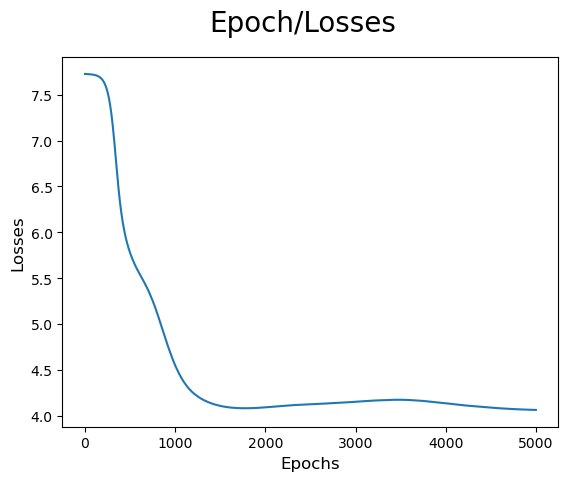

In [20]:
import matplotlib.pyplot as plt

fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[costs[i] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

In [21]:
# test
x_test = np.arange(vocab_size)
x_test = np.expand_dims(x_test, axis=0)
softmax_test, _ = forward(x_test, params)
top_sorted_inds = np.argsort(softmax_test, axis=0)[-4:,:]

for input_ind in range(vocab_size):
    input_word = id_to_word[input_ind]
    output_words = [id_to_word[output_ind] for output_ind in top_sorted_inds[::-1,
    input_ind]]
    print("{}'s skip-grams: {}".format(input_word, output_words))

جرام بسكويت عادي جرام زبدة جرام جبنة الكريم جرام جبنة قريش جرام لبن زبادي حبة بيض كوب سكر الكاستر ملعقة فانيليا's skip-grams: ['جرام دقيق اللوز جرام طحين متعدد الاستعمالات ملعقة صغيرة باكينج باودر ملعقة صغيرة باكينج صودا ملعقة صغيرة ملح جرام زبدة جرام سكر صفار بيض ملليلتر زيت بذور العنب ملليلتر عصير البرتقال الطازج المركز ملعقة كبيرة برش البرتقال جرام هريس القرع بياض البيض جرام جبنة الكريم كوب سكر بودرة ملعقة صغيرة خلاصة الفانيليا كوب كريمة باردة كوب فارماسيلي نجوم ملونة', 'كوب دقيق ملعقة صغيرة بيكنج باودر ملعقة صغيرة ملح كوب سكر ناعم الحبيبات حبة كبيرة بيض ملعقة صغيرة فانيليا سائلة كوب زبدة بدرجة الحرارة العادية كوب حليب ملعقة كبيرة بودرة الكاكاو السادة صلصة السكر كوب سكر ناعم بودرة كوب حليب ملعقة كبيرة بودرة الكاكاو السادة', 'كوب دقيق ملعقة كبيرة بيكنج باودر ملعقة صغيرة ملح كوب سكر ناعم الحبيبات حبة كبيرة بيض ملعقة صغيرة فانيليا سائلة كوب حليب كوب زيت ذرة كوب حليب كوب كريمة سائلة حبة كبيرة موز كوب سكر ملعقة كبيرة ماء ملعقة صغيرة عصير ليمون ملعقة كبيرة زبدة كوب زبادي', 'جرام دقيق ملعق

CBOW

In [28]:
text = " ".join(df['new_text'])
words = text.split()
vocab = set(words)
vocab_size = len(vocab)
embed_dim = 10
context_size = 2

word_to_ix = {word: i for i, word in enumerate(vocab)}
ix_to_word = {i: word for i, word in enumerate(vocab)}

In [29]:
data = []
for i in range(2, len(words) - 2):
    context = [words[i - 2], words[i - 1], words[i + 1], words[i + 2]]
    target = words[i]
    data.append((context, target))
print(data[:20])

[(['جرام', 'بسكويت', 'جرام', 'زبدة'], 'عادي'), (['بسكويت', 'عادي', 'زبدة', 'جرام'], 'جرام'), (['عادي', 'جرام', 'جرام', 'جبنة'], 'زبدة'), (['جرام', 'زبدة', 'جبنة', 'الكريم'], 'جرام'), (['زبدة', 'جرام', 'الكريم', 'جرام'], 'جبنة'), (['جرام', 'جبنة', 'جرام', 'جبنة'], 'الكريم'), (['جبنة', 'الكريم', 'جبنة', 'قريش'], 'جرام'), (['الكريم', 'جرام', 'قريش', 'جرام'], 'جبنة'), (['جرام', 'جبنة', 'جرام', 'لبن'], 'قريش'), (['جبنة', 'قريش', 'لبن', 'زبادي'], 'جرام'), (['قريش', 'جرام', 'زبادي', 'حبة'], 'لبن'), (['جرام', 'لبن', 'حبة', 'بيض'], 'زبادي'), (['لبن', 'زبادي', 'بيض', 'كوب'], 'حبة'), (['زبادي', 'حبة', 'كوب', 'سكر'], 'بيض'), (['حبة', 'بيض', 'سكر', 'الكاستر'], 'كوب'), (['بيض', 'كوب', 'الكاستر', 'ملعقة'], 'سكر'), (['كوب', 'سكر', 'ملعقة', 'فانيليا'], 'الكاستر'), (['سكر', 'الكاستر', 'فانيليا', 'كوب'], 'ملعقة'), (['الكاستر', 'ملعقة', 'كوب', 'دقيق'], 'فانيليا'), (['ملعقة', 'فانيليا', 'دقيق', 'ملعقة'], 'كوب')]


In [30]:
# embedings
embeddings = np.random.random_sample((vocab_size, embed_dim))

In [31]:
# linear model
def linear(m, theta):
    w = theta
    return m.dot(w)

# log softmax
def log_softmax(x):
    e_x = np.exp(x - np.max(x))
    return np.log(e_x / e_x.sum())

def NLLLoss(logs, targets):
    out = logs[range(len(targets)), targets]
    return -out.sum()/len(out)

def log_softmax_crossentropy_with_logits(logits,target):
    out = np.zeros_like(logits)
    out[np.arange(len(logits)),target] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- out + softmax) / logits.shape[0]

def forward(context_idxs, theta):
    m = embeddings[context_idxs].reshape(1, -1)
    n = linear(m, theta)
    o = log_softmax(n)
    return m, n, o

def backward(preds, theta, target_idxs):
    m, n, o = preds
    dlog = log_softmax_crossentropy_with_logits(n, target_idxs)
    dw = m.T.dot(dlog)
    return dw

def optimize(theta, grad, lr=0.03):
    theta -= grad * lr
    return theta

In [32]:
# init thetas
theta = np.random.uniform(-1, 1, (2 * context_size * embed_dim, vocab_size))

epoch_losses = {}

for epoch in range(80):
    losses = []
    for context, target in data:
        context_idxs = np.array([word_to_ix[w] for w in context])
        preds = forward(context_idxs, theta)
        target_idxs = np.array([word_to_ix[target]])
        loss = NLLLoss(preds[-1], target_idxs)
        losses.append(loss)
        grad = backward(preds, theta, target_idxs)
        theta = optimize(theta, grad, lr=0.03)
    
    epoch_losses[epoch] = losses
    
ix = np.arange(0,80)

Text(0, 0.5, 'Losses')

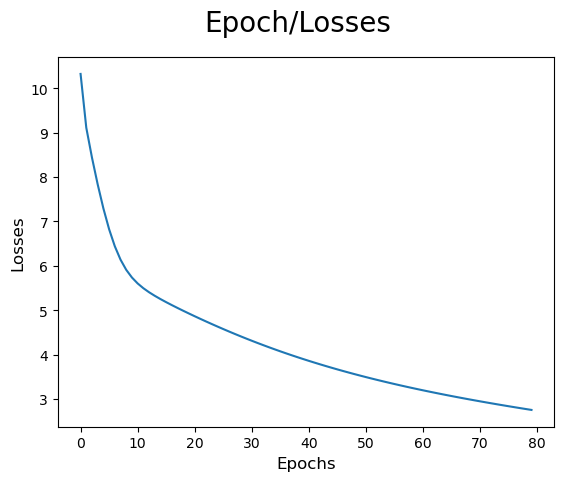

In [33]:
fig = plt.figure()
fig.suptitle('Epoch/Losses', fontsize=20)
plt.plot(ix,[epoch_losses[i][0] for i in ix])
plt.xlabel('Epochs', fontsize=12)
plt.ylabel('Losses', fontsize=12)

# C. Apply Glove and FastText approaches on the same DataSet.  <a id='fast'></a>

Glove 

In [34]:
import gensim.downloader as api
from gensim.models import KeyedVectors
import numpy as np

In [35]:
# Download and load the GloVe model
glove_model = api.load("glove-wiki-gigaword-100")

In [36]:
# Define a function to compute GloVe embeddings for text
def compute_glove_embedding(text):
    # Tokenize the text
    tokens = text.split()
    
    # Initialize an empty list to store word embeddings
    embeddings = []
    
    # Compute the GloVe embedding for each word in the text
    for token in tokens:
        if token in glove_model:
            embeddings.append(glove_model[token])
    
    # Calculate the average embedding for the entire text
    if embeddings:
        return np.mean(embeddings, axis=0)
    else:
        return np.zeros(glove_model.vector_size)  # Return zeros if no embeddings were found

In [37]:
# Apply the function to your DataFrame's 'new_text' column
df['glove_embedding'] = df['new_text'].apply(compute_glove_embedding)

In [38]:
# Display the DataFrame with GloVe embeddings
print(df.head())

                        _id                title properties           chef  \
0  66135d7bccad4da1905a3eb0  تشيز كيك قليل الدسم       سهلة  ليلى فتح الله   
1  66135d7bccad4da1905a3eb1    كيك الموز بالتوفي       سهلة    منال العالم   
2  66135d7bccad4da1905a3eb2   كيك ماربل بالكاكاو       سهلة    منال العالم   
3  66135d7bccad4da1905a3eb3     كيك القرع واللوز       سهلة   وصفات فتافيت   
4  66135d7bccad4da1905a3eb4         كعكة الجواهر       سهلة   وصفات فتافيت   

                                         ingredients  \
0  جرام بسكويت عادي جرام زبدة جرام جبنة الكريم جر...   
1  كوب دقيق ملعقة كبيرة بيكنج باودر ملعقة صغيرة م...   
2  كوب دقيق ملعقة صغيرة بيكنج باودر ملعقة صغيرة م...   
3  جرام دقيق اللوز جرام طحين متعدد الاستعمالات مل...   
4  عبوة تحتوي أنواع مختلفة الجيلاتين المنكه ورقات...   

                                             recipes  \
0  يحمى الفرن درجة مئوية بدون مروحة تغلف قاعدة قا...   
1  يثبت الرف الشبكي وسط الفرن يسخن الفرن درجة حرا...   
2  يحضر قالب فتحة الوسط سع

FastText

In [39]:
import gensim.downloader as api

# Load the pre-trained FastText model
fasttext_model = api.load("fasttext-wiki-news-subwords-300")

In [40]:
def compute_similarity(text):
    # Tokenize the text
    tokens = text.split()
    # Compute the similarity between adjacent word pairs
    similarities = []
    for i in range(len(tokens) - 1):
        word1 = tokens[i]
        word2 = tokens[i + 1]
        # Check if both words exist in the model's vocabulary
        if word1 in fasttext_model.key_to_index and word2 in fasttext_model.key_to_index:
            similarity = fasttext_model.similarity(word1, word2)
            similarities.append(similarity)
    # Return the average similarity
    if similarities:
        return sum(similarities) / len(similarities)
    else:
        return 0.0  # Return 0 if no similarities were computed

# Apply the function to your DataFrame's 'new_text' column
df['similarity'] = df['new_text'].apply(compute_similarity)

In [41]:
# Print the DataFrame with the computed similarities
print(df[['new_text', 'similarity']].head(10))

                                            new_text  similarity
0  جرام بسكويت عادي جرام زبدة جرام جبنة الكريم جر...    0.000000
1  كوب دقيق ملعقة كبيرة بيكنج باودر ملعقة صغيرة م...    0.000000
2  كوب دقيق ملعقة صغيرة بيكنج باودر ملعقة صغيرة م...    0.000000
3  جرام دقيق اللوز جرام طحين متعدد الاستعمالات مل...    0.000000
4  عبوة تحتوي أنواع مختلفة الجيلاتين المنكه ورقات...    0.922854
5  جم الدقيق جم الكاكاو البودرة ملعقة صغيرة البيك...    0.000000
6  جرام دقيق ملعقة صغيرة نصف بيكنج باودر جرام زبد...    0.784440
7  بيضة أكواب الدقيق ملعقة صغيرة برش الليمون ملعق...    0.841293
8  كوب دقيق ملعقة صغيرة بيكنج باودر كوب سميد ناعم...    0.000000
9  جرام زبدة كوب سكر ملعقة صغيرة فانيليا حبة بيض ...    0.000000


# D. Plot all the encoded / vectorized vectors by using Tsne Algorithm  <a id='plot'></a>

In [42]:
# Function to apply t-SNE to any set of embeddings and plot them.

from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

def plot_tsne(data, title='t-SNE plot'):
    """
    Generate a t-SNE plot for the given data.

    Parameters:
    - data (array-like): The input data, should be a 2D array.
    - title (str): Title for the plot (default is 't-SNE plot').

    Returns:
    - None
    """
    tsne = TSNE(n_components=2, random_state=42)
    reduced_data = tsne.fit_transform(data)
    
    plt.figure(figsize=(10, 6))
    plt.scatter(reduced_data[:, 0], reduced_data[:, 1], alpha=0.5)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

C:\Users\Administrator\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:110: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\Administrator\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 217, in _count_physical_cores
    raise ValueError(


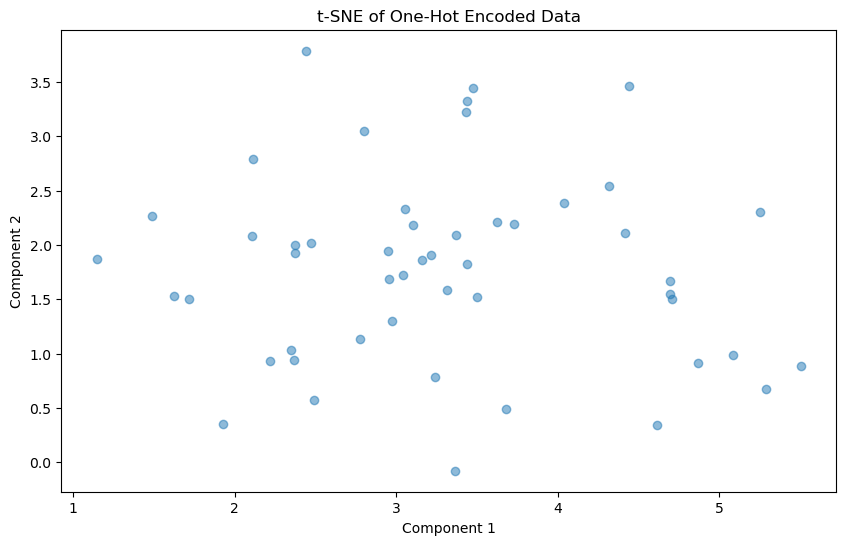

In [43]:
# Convert one-hot encoded ingredients to NumPy array
one_hot_array = one_hot_encoded_ingredients.to_numpy()
plot_tsne(one_hot_array, 't-SNE of One-Hot Encoded Data')

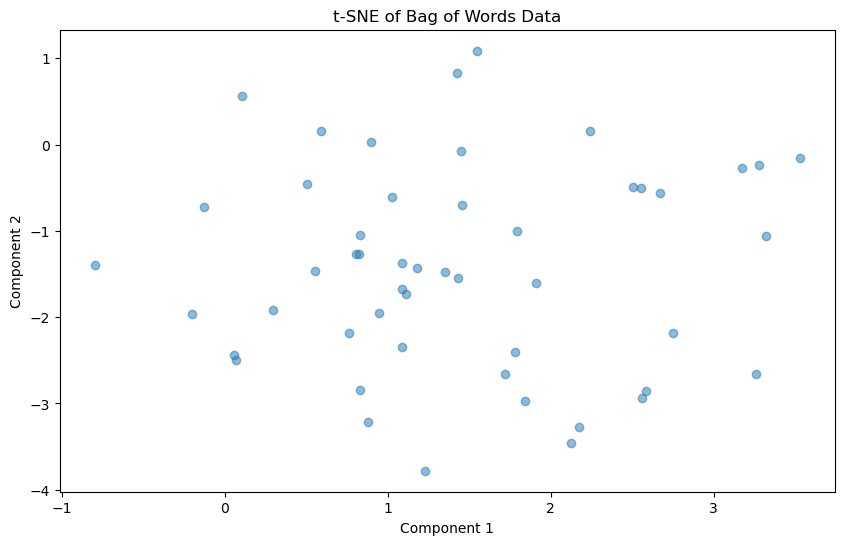

In [44]:
# Convert bag of words dataframe to NumPy array
bow_array = bag_of_words_df.to_numpy()
plot_tsne(bow_array, 't-SNE of Bag of Words Data')

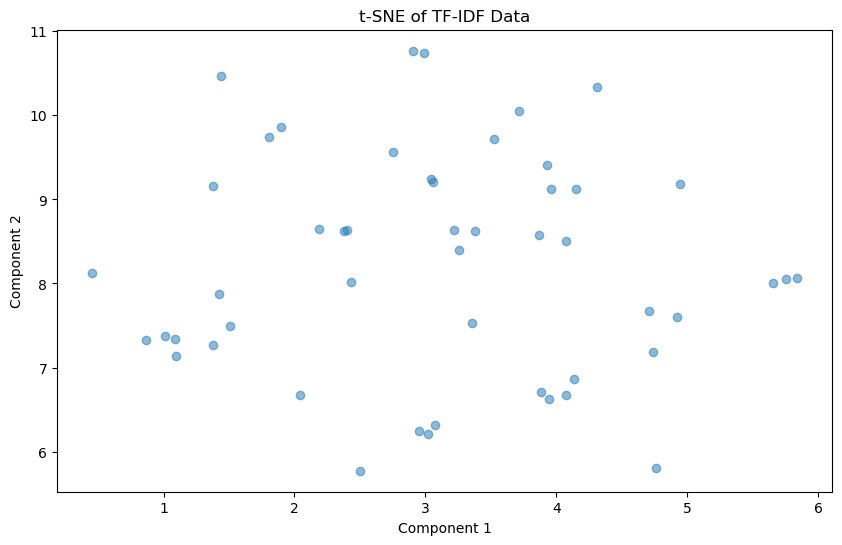

In [45]:
# Convert TF-IDF dataframe to NumPy array
tfidf_array = X_tfidf.toarray()
plot_tsne(tfidf_array, 't-SNE of TF-IDF Data')

# 3. Lab Reflection <a id='lab'></a>

In this lab, we delved into Natural Language Processing (NLP), exploring both rule-based techniques and advanced word embedding methods.

We began by harnessing the power of regular expressions (Regex) to extract information from text, showcasing its efficiency in generating a bill from unstructured data.
Transitioning to word embedding, we applied techniques like one-hot encoding, TF-IDF, Word2Vec (Skip Gram, CBOW), GloVe, and FastText to convert text into numerical vectors.
Visualizing the encoded vectors with Tsne Algorithm offered insights into their distribution, aiding in evaluating their efficacy.
Implementing preprocessing functions, like cleaning Arabic text, emphasized the importance of data quality in NLP tasks.

Overall, the lab provided a practical understanding of NLP techniques, empowering us with essential skills for text analysis and processing.